<a href="https://colab.research.google.com/github/eun-woo/data_analysis/blob/main/%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

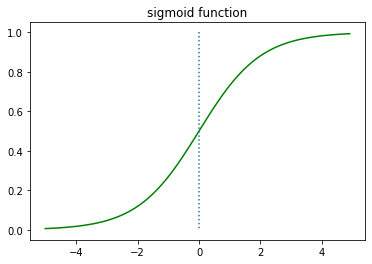

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('sigmoid function')
plt.show()


In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

In [17]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
b_cancer_df = pd.DataFrame(b_cancer.data, 
                           columns = b_cancer.feature_names)

b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [19]:
b_cancer_df.shape

(569, 31)

In [20]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

b_cancer_scaled = scaler.fit_transform(b_cancer.data)

pd.DataFrame(b_cancer_scaled, columns = b_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [23]:
lr_b_cancer = LogisticRegression()
lr_b_cancer.fit(X_train, Y_train)
Y_predict = lr_b_cancer.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [25]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(accuracy, precision, recall, f1))
print('ROC_AUC: {0:.3f}'.format(roc_auc))


정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982
ROC_AUC: 0.972


In [26]:
import numpy as np
import pandas as pd


In [27]:
feature_name_df = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/features.txt', sep = '\s+',
                              header=None, names = ['index', 'feature_name'],
                              engine='python')
feature_name_df.shape

(561, 2)

In [28]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[0]

'tBodyAcc-mean()-X'

In [29]:
f_name=[]
for i, n in enumerate(feature_name):
  f_name.append(n + '_'+str(i))

In [30]:
X_train = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/train/X_train.txt',sep = '\s+',
                      names=f_name, engine='python')
X_test = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/test/X_test.txt', sep='\s+',
                     names=f_name, engine='python')
Y_train = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None,
                      names=['action'], engine='python')
Y_test = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'], engine='python')



In [31]:
X_train.shape

(7352, 561)

In [32]:
X_train.head()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,tBodyAcc-max()-X_9,...,fBodyBodyGyroJerkMag-meanFreq()_551,fBodyBodyGyroJerkMag-skewness()_552,fBodyBodyGyroJerkMag-kurtosis()_553,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [33]:
print(Y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [34]:
label_name_df = pd.read_csv('/content/drive/MyDrive/data/UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None,
                            names=['index', 'label'],
                            engine='python')
label_name_df

,index,label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [35]:
label_name = label_name_df.iloc[:, 1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_HAR = DecisionTreeClassifier(random_state=156)
dt_HAR.fit(X_train, Y_train)
Y_predict = dt_HAR.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_predict)
print('결정트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정트리 예측 정확도 : 0.8548


In [38]:
params = dt_HAR.get_params()
pd.Series(params)

ccp_alpha                    0.0
class_weight                None
criterion                   gini
max_depth                   None
max_features                None
max_leaf_nodes              None
min_impurity_decrease        0.0
min_samples_leaf               1
min_samples_split              2
min_weight_fraction_leaf     0.0
random_state                 156
splitter                    best
dtype: object

In [51]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_HAR,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv=5,
                       return_train_score=True)

grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:


cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [54]:
params = {'max_depth': [8, 16, 20],
          'min_samples_split': [8, 16, 24]}
grid_cv = GridSearchCV(dt_HAR, param_grid=params,
                       scoring='accuracy',
                       cv=5,
                       return_train_score=True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [63]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8717


In [64]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index = X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]
feature_top10

tGravityAcc-min()-X_52                 0.253354
fBodyAccJerk-bandsEnergy()-1,16_389    0.212584
angle(Y,gravityMean)_559               0.139001
fBodyAccMag-energy()_508               0.115478
tGravityAcc-arCoeff()-Z,2_74           0.101885
fBodyGyro-maxInds-X_448                0.023971
tGravityAcc-energy()-Y_57              0.020470
tBodyGyro-correlation()-Y,Z_159        0.016513
tGravityAccMag-arCoeff()1_222          0.015741
tBodyAcc-correlation()-X,Y_37          0.009972
dtype: float64

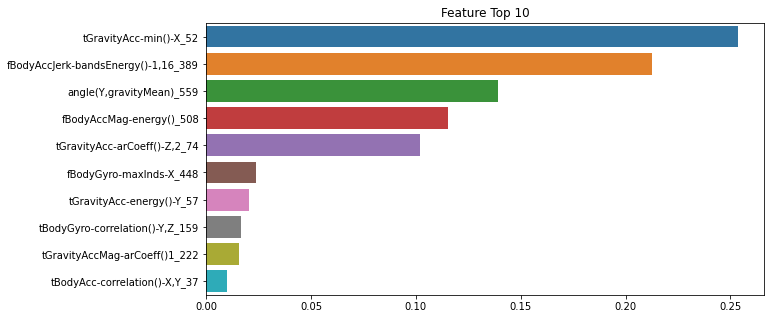

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.title('Feature Top 10')
sns.barplot(x = feature_top10, y=feature_top10.index)
plt.show()

In [66]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from sklearn.tree import export_graphviz

export_graphviz(best_dt_HAR, out_file="tree.dot",
                class_names=label_name,
                feature_names = feature_name,
                impurity=True,
                filled=True)

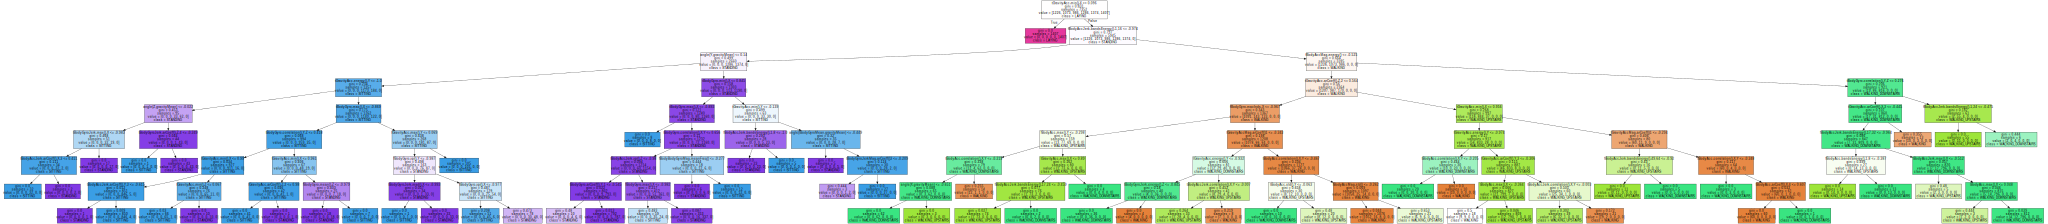

In [68]:
import graphviz

with open("./tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)